In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

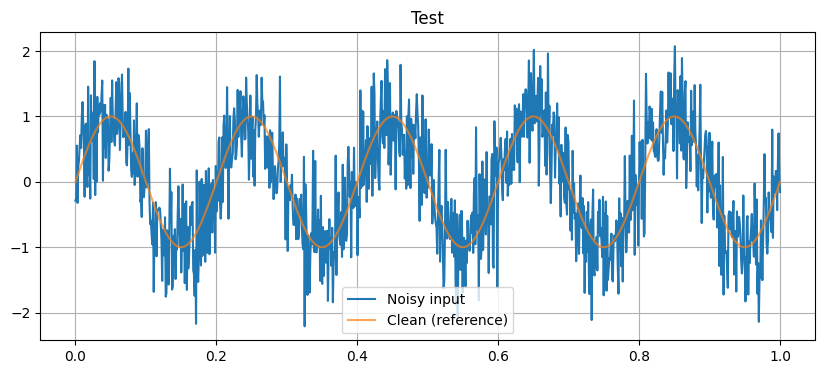

In [5]:
fs = 1_000                 
t  = np.linspace(0, 1, fs)
f0 = 5                     

clean = np.sin(2*np.pi*f0*t)       
noise = 0.5*np.random.randn(len(t)) 
x      = clean + noise            

plt.figure(figsize=(10,4))
plt.plot(t, x, label='Noisy input')
plt.plot(t, clean, label='Clean (reference)', alpha=0.7)
plt.title('Test'); plt.legend(); plt.grid(); plt.show()


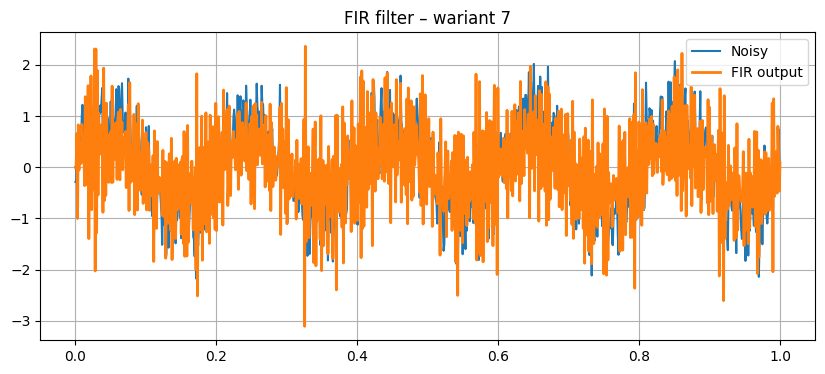

In [6]:
def fir_filter(x, b):
    M = len(b)
    y = np.zeros_like(x)
    for n in range(M-1, len(x)):
        y[n] = np.dot(b, x[n-M+1:n+1][::-1])
    return y

b_fir = np.array([1, -1, 0.5])

y_fir = fir_filter(x, b_fir)

plt.figure(figsize=(10,4))
plt.plot(t, x,     label='Noisy')
plt.plot(t, y_fir, label='FIR output', linewidth=2)
plt.title('FIR filter – wariant 7'); plt.legend(); plt.grid(); plt.show()


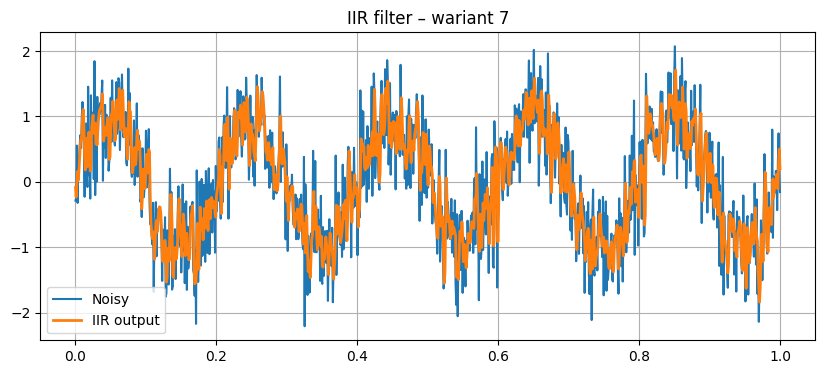

In [7]:
b_iir = np.array([0.3, 0.4])
a_iir = np.array([1, -0.5, 0.2])

y_iir = signal.lfilter(b_iir, a_iir, x)

plt.figure(figsize=(10,4))
plt.plot(t, x,     label='Noisy')
plt.plot(t, y_iir, label='IIR output', linewidth=2)
plt.title('IIR filter – wariant 7'); plt.legend(); plt.grid(); plt.show()


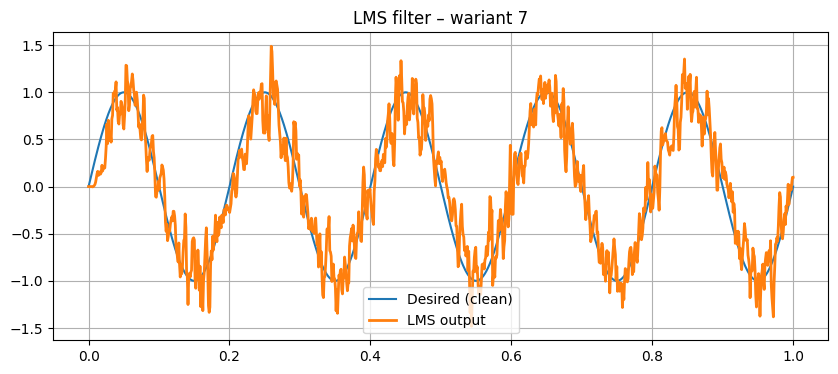

In [8]:
def lms_filter(x, d, mu, num_taps):
    n = len(x)
    w = np.zeros(num_taps)  
    y = np.zeros(n)          
    e = np.zeros(n)         

    for i in range(num_taps, n):
        x_seg = x[i-num_taps:i][::-1]  
        y[i] = np.dot(w, x_seg)       
        e[i] = d[i] - y[i]             
        w    += mu * e[i] * x_seg      
    return y, e, w

mu, M = 0.05, 4
y_lms, e_lms, w_final = lms_filter(x, clean, mu, M)

plt.figure(figsize=(10,4))
plt.plot(t, clean, label='Desired (clean)')
plt.plot(t, y_lms, label='LMS output', linewidth=2)
plt.title('LMS filter – wariant 7'); plt.legend(); plt.grid(); plt.show()


In [9]:
import numpy as np

def snr(signal, noise):
    return 10*np.log10(np.sum(signal**2)/np.sum(noise**2))

print("SNR before:", snr(clean, x-clean))
print("SNR FIR :",   snr(clean, y_fir-clean))
print("SNR IIR :",   snr(clean, y_iir-clean))
print("SNR LMS :",   snr(clean, y_lms-clean))


SNR before: 2.8967524632403574
SNR FIR : -1.6474177291512935
SNR IIR : 6.659781213406415
SNR LMS : 9.897784460328378
